# 220527 Set 4 quast results

In [1]:
from pathlib import Path

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams.update({
    'axes.grid.which': 'both',
})

## Setup

In [4]:
DATESTR = '220527'
NBNAME = f'{DATESTR}-set4-quast-results'

In [5]:
infiles = dict(
    results='data-src/220527-set4-quast-results.tsv',
)

## Load data

In [6]:
results = pd.read_csv(infiles['results'], sep='\t', index_col=0)
results.shape[0]

605

In [7]:
results2 = results[[col for col in results if not col.endswith(')')]]

In [8]:
assert np.all(results2['# N\'s per 100 kbp'] == 0)
del results2['# N\'s per 100 kbp']

In [9]:
results2.columns.name = 'statistic'

## Plot

/home/jared/opt/anaconda3/envs/gambit-pub/lib/python3.9/site-packages/seaborn/categorical.py:3808: UserWarning: Setting `sharey=False` with `color=None` may cause different levels of the `y` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharey", "y"), UserWarning)


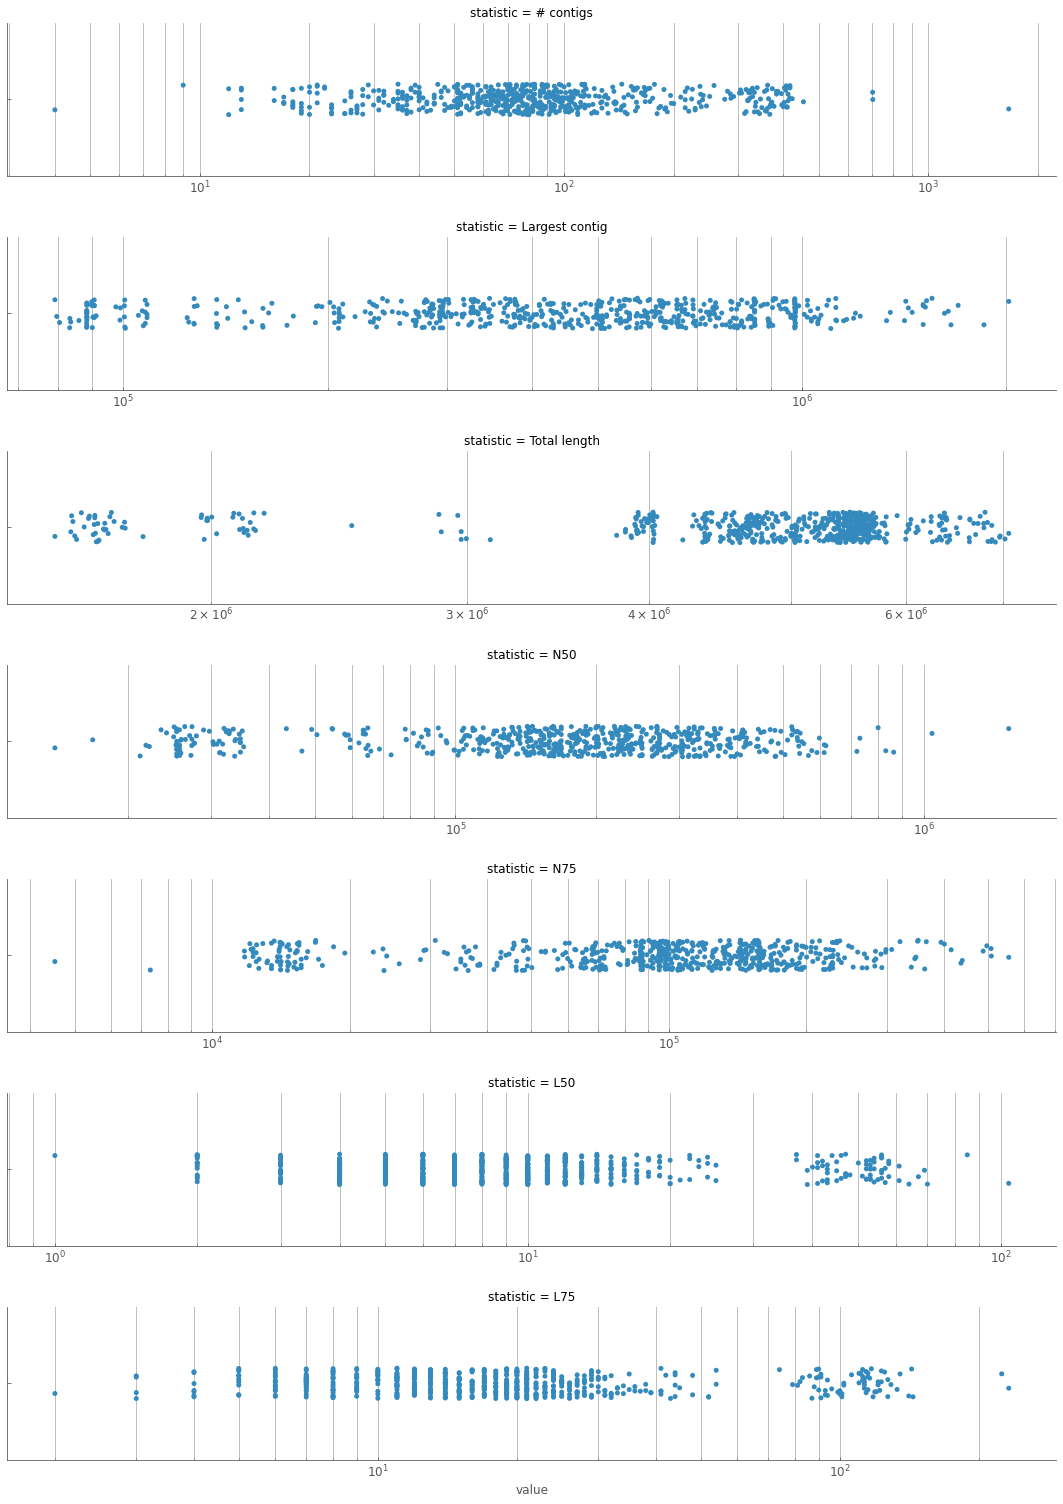

In [10]:
fg = sns.catplot(
    data=results2.unstack().to_frame('value').reset_index(),
    x='value',
    row='statistic',
    sharex=False, sharey=False,
    aspect=5,
    height=3,
)

for ax in fg.axes.flat:
    ax.set_xscale('log')